In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3544/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


In [4]:
data['Speed Limit'].value_counts()

 100.0    19222
 60.0     14275
 80.0      6606
 110.0     6430
 50.0      3255
 70.0      2743
-9.0       1434
 90.0      1181
 40.0       403
 75.0       254
 130.0      137
 20.0        34
 10.0        24
 30.0        16
 5.0          6
 25.0         3
 15.0         1
Name: Speed Limit, dtype: int64

Optimized Code

01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:19 - cmdstanpy - INFO - Chain [1] done processing



Predictions for Above 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  43.157569   26.533818   62.337625
421 2024-02-01  36.847239   18.285618   55.066961
422 2024-03-01  48.513270   29.545473   67.345484


<Figure size 1000x600 with 0 Axes>

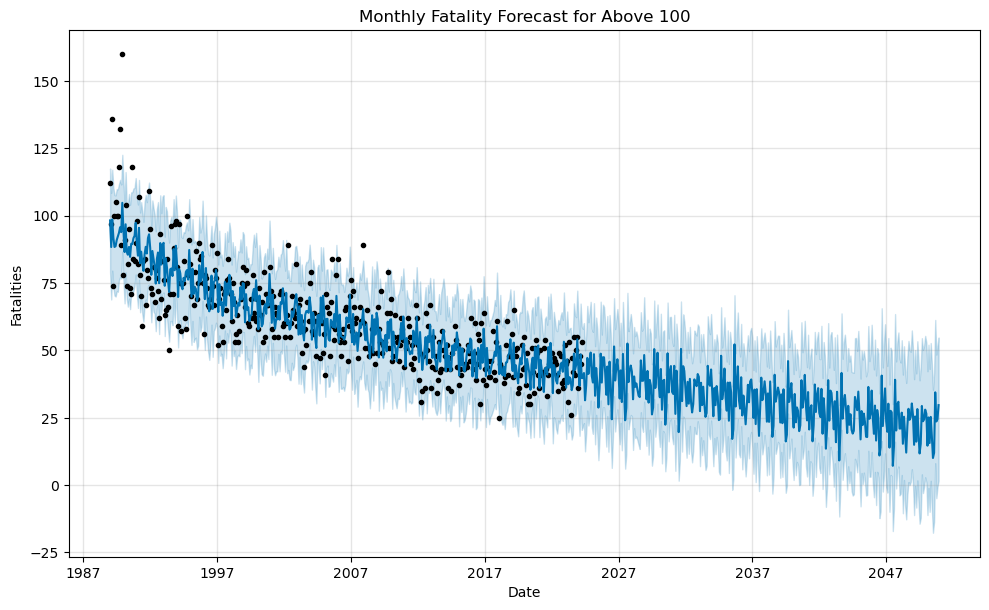

01:24:20 - cmdstanpy - INFO - Chain [1] start processing



Predictions for Above 100 - 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  32.589401   14.166456   49.910512
494 2030-02-28  43.076418   23.727372   63.578143
495 2030-03-31  27.961512    8.058314   46.268952
496 2030-04-30  38.751805   20.091485   57.033190
497 2030-05-31  39.055714   19.202366   57.439251
498 2030-06-30  22.414878    5.124947   40.908813
499 2030-07-31  28.879365   10.297336   47.185548
500 2030-08-31  48.912179   30.091730   67.744495
501 2030-09-30  34.410351   16.234286   54.400278
502 2030-10-31  42.434581   23.433856   62.363059
503 2030-11-30  44.166964   24.375955   62.427631
504 2030-12-31  34.591071   17.803865   53.890871

Predictions for Above 100 - 2040:
            ds       yhat  yhat_lower  yhat_upper
613 2040-01-31  21.329648    1.890635   41.223265
614 2040-02-29  33.806843   13.893242   52.558808
615 2040-03-31  23.296638    3.661973   42.688139
616 2040-04-30  28.822846    8.588930   50.416408
617 2040-05-31  27.527941    7

01:24:20 - cmdstanpy - INFO - Chain [1] done processing



Predictions for Below 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  44.273134   22.348810   64.103899
421 2024-02-01  47.673048   28.337904   67.699978
422 2024-03-01  57.809156   37.493740   77.717177


<Figure size 1000x600 with 0 Axes>

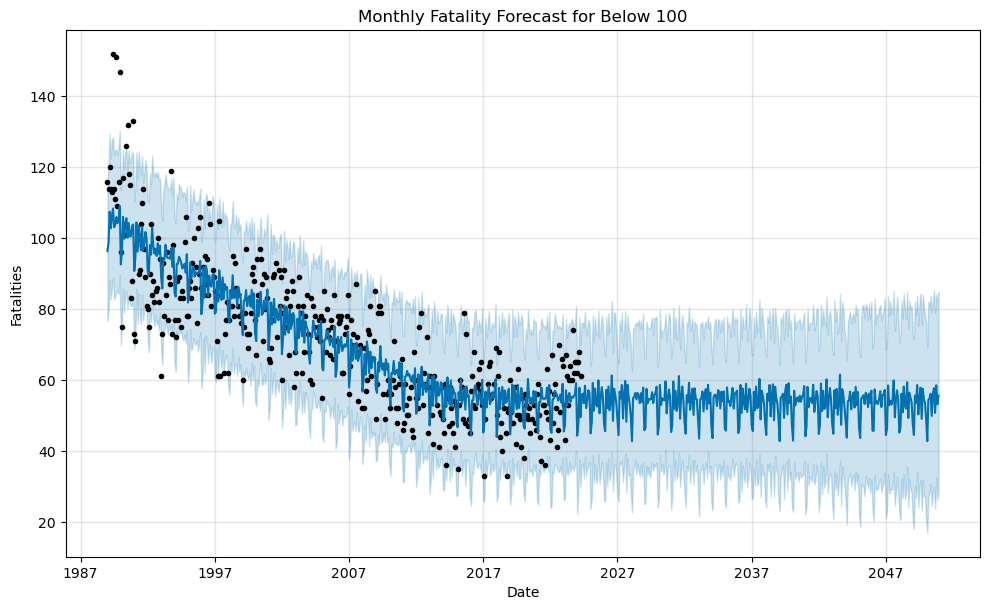


Predictions for Below 100 - 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  46.934065   26.448429   66.981000
494 2030-02-28  58.591045   38.776508   79.856095
495 2030-03-31  52.964775   34.278496   71.808053
496 2030-04-30  54.830810   36.275324   73.915552
497 2030-05-31  54.309421   33.431563   73.931522
498 2030-06-30  54.264864   33.925634   74.479074
499 2030-07-31  59.616360   40.397414   78.653226
500 2030-08-31  50.565086   28.851642   70.681639
501 2030-09-30  54.588126   35.218945   74.663862
502 2030-10-31  57.310954   35.971288   78.886059
503 2030-11-30  55.382820   35.539850   77.234762
504 2030-12-31  45.317500   23.400233   66.240844

Predictions for Below 100 - 2040:
            ds       yhat  yhat_lower  yhat_upper
613 2040-01-31  42.876699   22.838281   64.700553
614 2040-02-29  56.941931   36.656447   78.783931
615 2040-03-31  52.801890   32.127107   74.184579
616 2040-04-30  54.622691   33.139108   76.377378
617 2040-05-31  55.061209   34

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from prophet import Prophet

# تمیز کردن داده‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x >= 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# آماده‌سازی مدل‌ها و پیش‌بینی‌ها
forecasts = {}
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=True,
        weekly_seasonality=True
    )
    model.fit(speed_data)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')
    forecast = model.predict(future)

    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # چاپ پیش‌بینی سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'\nPredictions for {speed_category} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()

    # پیش‌بینی برای سال‌های 2030، 2040 و 2050
    forecast_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    forecast_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]

    print(f'\nPredictions for {speed_category} - 2030:')
    print(forecast_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    print(f'\nPredictions for {speed_category} - 2040:')
    print(forecast_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    print(f'\nPredictions for {speed_category} - 2050:')
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# استخراج داده‌های واقعی برای سال 2023
actual_2023 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2023-01-01') & (fatalities_by_speed_month['Date'] <= '2023-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)

# ارزیابی دقت مدل‌ها برای سال 2023
for speed_category in speed_categories:
    actual_counts_2023 = actual_2023[[speed_category]].reset_index().rename(columns={'Date': 'ds', speed_category: 'y'})
    forecast_2023 = forecasts[speed_category][forecasts[speed_category]['ds'].isin(actual_counts_2023['ds'])]

    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f'\nEvaluation metrics for {speed_category} (2023):')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R2: {r2}')
    print(f'MAPE: {mape}')

# استخراج داده‌های واقعی برای سال 2024
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-12-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('\nActual fatalities for 2024:')
print(actual_2024)


In [7]:
data['Speed Limit'] = data['Speed Limit'].astype('int')
data['Speed Limit'].value_counts()


 100    19222
 60     14275
 80      6606
 110     6430
 50      3255
 70      2743
-9       1434
 90      1181
 40       403
 75       254
 130      137
 20        34
 10        24
 30        16
 5          6
 25         3
 15         1
Name: Speed Limit, dtype: int64

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x > 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# تقسیم داده‌ها به بخش‌های آموزش و تست
train_data = fatalities_by_speed_month[fatalities_by_speed_month['Date'] <= '2022-12-31']
test_data = fatalities_by_speed_month[fatalities_by_speed_month['Date'] >= '2023-01-01']

# آموزش مدل Prophet و پیش‌بینی
speed_models = {}
forecasts = {}
for speed in fatalities_by_speed_month['Speed_Category'].unique():
    speed_data = train_data[train_data['Speed_Category'] == speed][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(speed_data)
    speed_models[speed] = model
    
    future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')
    forecast = model.predict(future_dates)
    forecasts[speed] = forecast

# محاسبه و چاپ معیارهای ارزیابی برای دوره تست (2023)
print("Evaluation Metrics for the Test Period (2023):")
for speed, forecast in forecasts.items():
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    actual_counts_2023 = test_data[test_data['Speed_Category'] == speed][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})

    # Ensure the indices match
    forecast_2023 = forecast_2023.set_index('ds').reindex(actual_counts_2023['ds']).reset_index()
    
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    
    print(f"{speed} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}, MAPE: {mape:.2f}%")
    
# پیش‌بینی‌های سه ماه اول 2024
print("\nPredictions for Q1 2024:")
for speed, forecast in forecasts.items():
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f"\n{speed} - Q1 2024 Predictions:")
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# پیش‌بینی برای سال‌های 2030، 2040 و 2050
print("\nPredictions for 2030, 2040, 2050:")
for speed, forecast in forecasts.items():
    forecast_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    forecast_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"\n{speed} - 2030 Predictions:")
    print(forecast_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print(f"\n{speed} - 2040 Predictions:")
    print(forecast_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print(f"\n{speed} - 2050 Predictions:")
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# رسم نمودار پیش‌بینی
fig, axes = plt.subplots(nrows=len(forecasts), ncols=1, figsize=(14, 8 * len(forecasts)))

for ax, (speed, forecast) in zip(axes, forecasts.items()):
    model = speed_models[speed]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Fatalities')
    
    train_speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed]
    ax.scatter(train_speed_data['Date'], train_speed_data['Fatalities'], color='blue', s=10, label='Training Data')
    
    test_speed_data = test_data[test_data['Speed_Category'] == speed].groupby('Date').size().reset_index(name='Fatalities')
    ax.scatter(test_speed_data['Date'], test_speed_data['Fatalities'], color='red', s=10, label='Test Data')
    
    ax.legend()
    ax.set_title(f'Forecast for {speed}')

plt.tight_layout()
plt.show()

# چاپ تعداد واقعی تلفات برای سال‌های 2013 تا 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


01:07:11 - cmdstanpy - INFO - Chain [1] start processing
01:07:11 - cmdstanpy - INFO - Chain [1] done processing
01:07:11 - cmdstanpy - INFO - Chain [1] start processing
01:07:11 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023):


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

00:38:41 - cmdstanpy - INFO - Chain [1] start processing
00:38:41 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Above 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  15.449468    5.566366   24.311737
421 2024-02-01   9.213214   -0.203097   18.515547
422 2024-03-01  14.316161    5.353618   23.355346


<Figure size 1000x600 with 0 Axes>

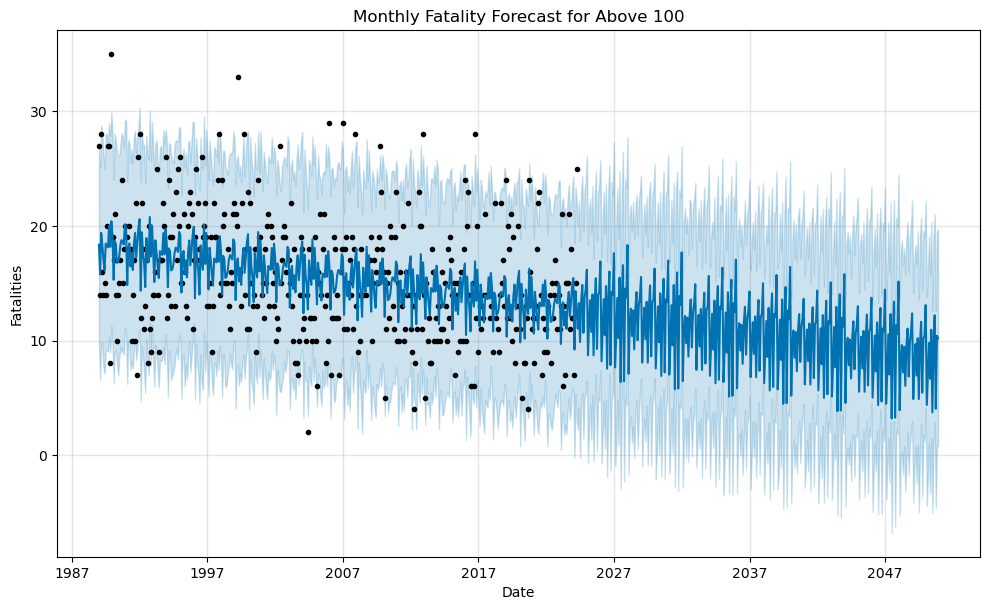

00:38:41 - cmdstanpy - INFO - Chain [1] start processing
00:38:41 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Below 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  76.203765   49.361315  103.614413
421 2024-02-01  74.066452   47.781365   99.280373
422 2024-03-01  87.745403   61.828355  115.234692


<Figure size 1000x600 with 0 Axes>

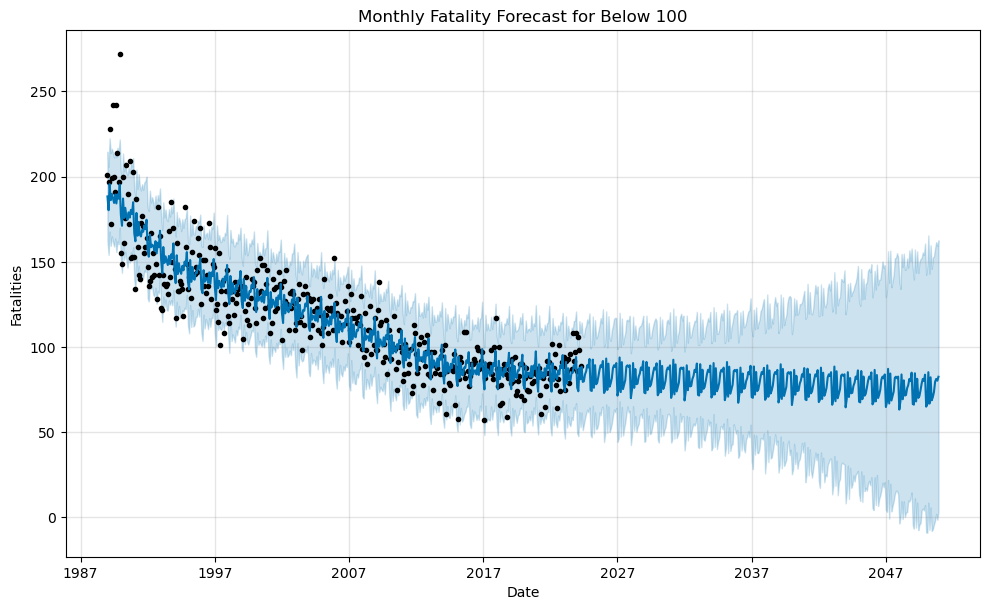

Actual fatalities for 2024:
Speed_Category  Above 100  Below 100
Date                                
2024-01-01             12         86
2024-02-01              7        106
2024-03-01             15         98
2024-04-01             25         89


In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x > 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست دسته‌بندی‌های سرعت در دیتاست
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    # آماده‌سازی داده‌ها برای Prophet
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(speed_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'Predictions for {speed_category} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    #plt.savefig(f'forecast_monthly_{speed_category}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()

# استخراج داده‌های واقعی برای سال 2024
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-12-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('Actual fatalities for 2024:')
print(actual_2024)


00:14:56 - cmdstanpy - INFO - Chain [1] start processing
00:14:56 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for Above 100 - Year 2023:
MAE: 4.663755037487481
MSE: 34.72440911938608
RMSE: 5.892742071343873


<Figure size 1000x600 with 0 Axes>

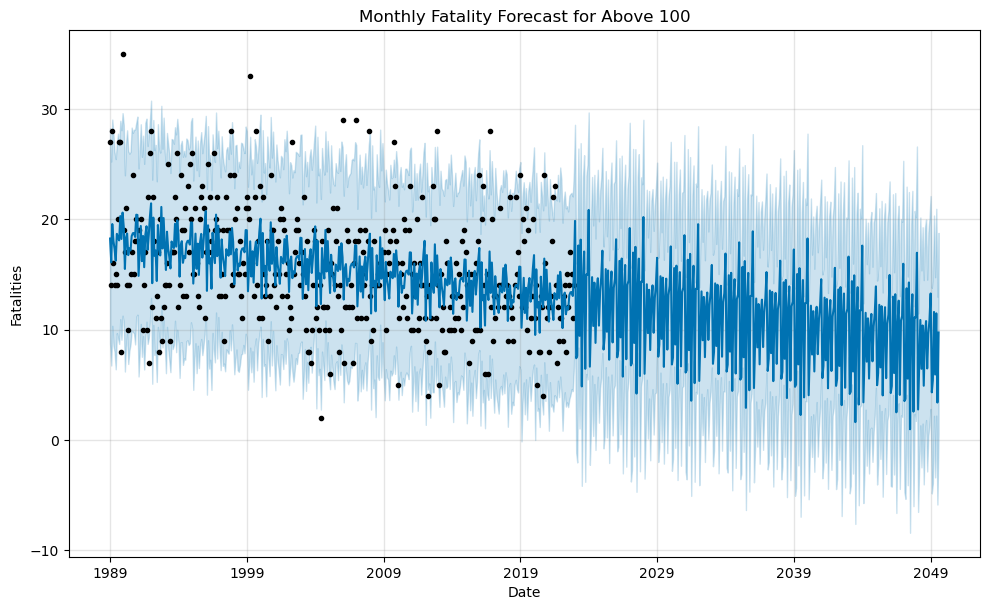

00:14:56 - cmdstanpy - INFO - Chain [1] start processing
00:14:56 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for Below 100 - Year 2023:
MAE: 18.010981770781306
MSE: 451.99246267945074
RMSE: 21.260114361861998


<Figure size 1000x600 with 0 Axes>

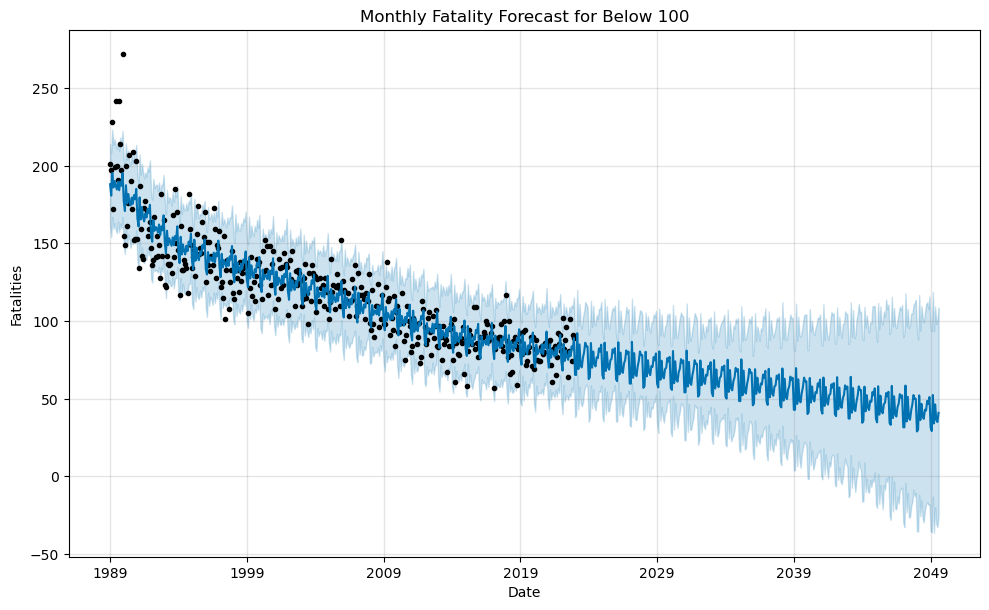

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error



# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x > 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست دسته‌بندی‌های سرعت در دیتاست
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# دوره آموزشی تا پایان سال 2022
train_end_date = '2022-12-31'

for speed_category in speed_categories:
    # آماده‌سازی داده‌ها برای Prophet
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']
    
    # تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
    train_data = speed_data[speed_data['ds'] <= train_end_date]
    test_data = speed_data[(speed_data['ds'] > train_end_date) & (speed_data['ds'] <= '2023-12-31')]

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        )
    model.fit(train_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # ارزیابی مدل برای سال 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    test_data = test_data.set_index('ds')
    forecast_2023 = forecast_2023.set_index('ds')
    
    mae = mean_absolute_error(test_data['y'], forecast_2023['yhat'])
    mse = mean_squared_error(test_data['y'], forecast_2023['yhat'])
    rmse = mean_squared_error(test_data['y'], forecast_2023['yhat'], squared=False)
    
    print(f'Evaluation for {speed_category} - Year 2023:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()
